In [21]:
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr

In [23]:
df=pd.read_csv(r"/content/drive/MyDrive/TSLA.excel (2).csv")

In [24]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,03-02-2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [26]:
df.shape

(2416, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Data Visualization

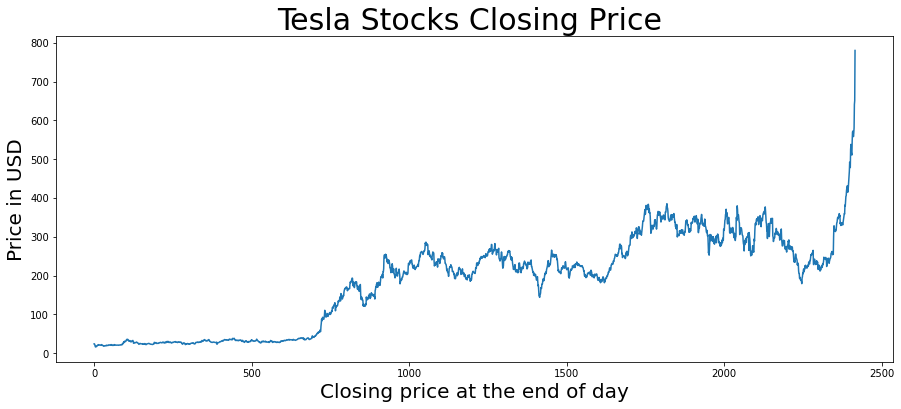

In [28]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.title("Tesla Stocks Closing Price ",fontsize=30)
plt.xlabel("Closing price at the end of day",fontsize=20)

plt.ylabel("Price in USD",fontsize=20)
plt.show()


Text(0.5, 0, 'Day from 29-06-2010 to 03-02-2020')

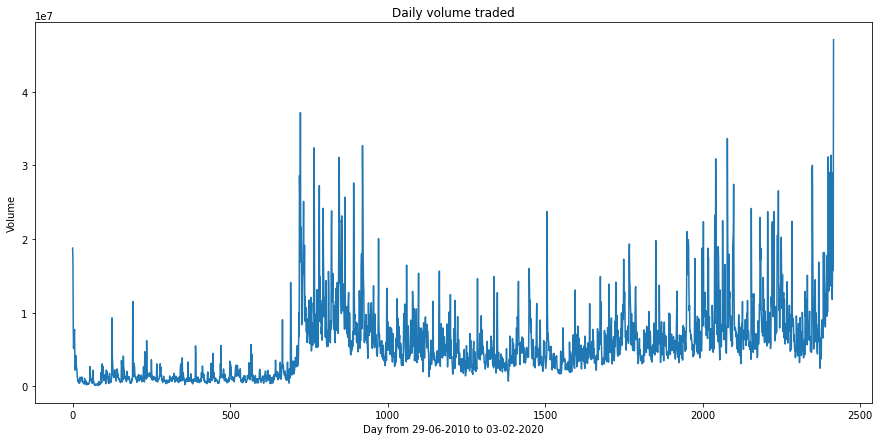

In [29]:
plt.figure(figsize=(15,7))
plt.plot(df['Volume'])
plt.title('Daily volume traded')
plt.ylabel('Volume')
plt.xlabel('Day from 29-06-2010 to 03-02-2020')

In [30]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [31]:
df=df.drop(columns=['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.00,17.540001,23.889999,18766300
1,1,25.790001,30.42,23.299999,23.830000,17187100
2,2,25.000000,25.92,20.270000,21.959999,8218800
3,3,23.000000,23.10,18.709999,19.200001,5139800
4,4,20.000000,20.00,15.830000,16.110001,6866900


In [32]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    343.527601
2412    347.041701
2413    351.175301
2414    355.363101
2415    360.807701
Name: Close, Length: 2416, dtype: float64

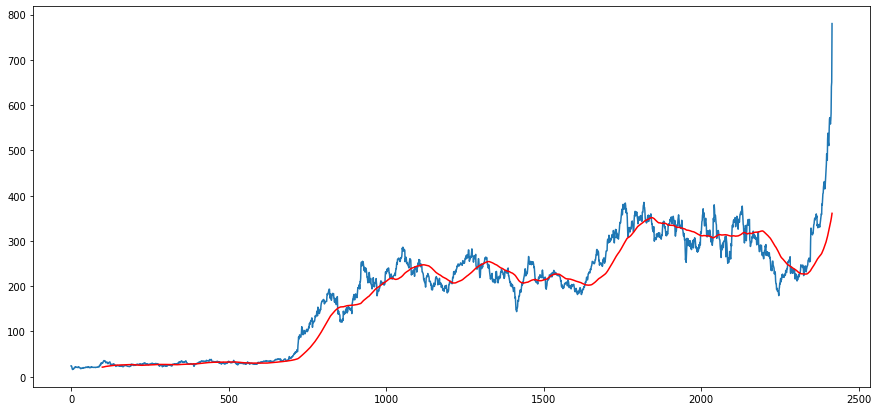

In [33]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [34]:
ma50=df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    418.773402
2412    423.406202
2413    429.179001
2414    435.190602
2415    443.600202
Name: Close, Length: 2416, dtype: float64

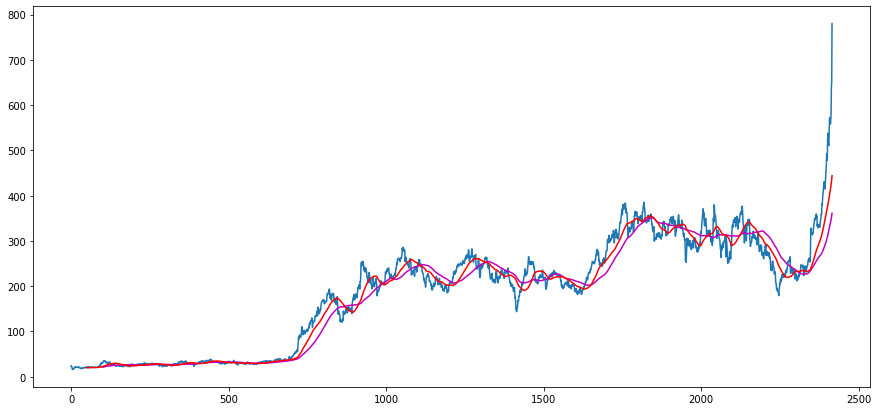

In [35]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma100,'m')
plt.plot(ma50,'r')

Splitting data for testing and traning

In [37]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing)

(1691, 1)
           Close
1691  261.500000
1692  261.920013
1693  250.679993
1694  255.009995
1695  254.779999
...          ...
2411  566.900024
2412  580.989990
2413  640.809998
2414  650.570007
2415  780.000000

[725 rows x 1 columns]


In [38]:
data_training.head()

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [39]:
data_testing.head()

,Close
1691,261.500000
1692,261.920013
1693,250.679993
1694,255.009995
1695,254.779999


In [44]:
from sklearn.preprocessing import MinMaxScaler
Scalar=MinMaxScaler(feature_range=(0,1))


In [47]:
data_training_array=Scalar.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.89624035],
       [0.88784039],
       [0.91122698]])

In [49]:
data_training_array.shape

(1691, 1)

In [50]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [51]:
x_train.shape

(1591, 100, 1)

LSTM Model(long short term memory)

In [52]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [54]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units= 1))


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [57]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
50/50 [==============================] - 20s 283ms/step - loss: 0.0660
Epoch 2/50
50/50 [==============================] - 14s 283ms/step - loss: 0.0135
Epoch 3/50
50/50 [==============================] - 14s 284ms/step - loss: 0.0106
Epoch 4/50
50/50 [==============================] - 14s 282ms/step - loss: 0.0101
Epoch 5/50
50/50 [==============================] - 14s 281ms/step - loss: 0.0096
Epoch 6/50
50/50 [==============================] - 18s 352ms/step - loss: 0.0090
Epoch 7/50
50/50 [==============================] - 14s 283ms/step - loss: 0.0086
Epoch 8/50
50/50 [==============================] - 14s 282ms/step - loss: 0.0100
Epoch 9/50
50/50 [==============================] - 18s 358ms/step - loss: 0.0089
Epoch 10/50
50/50 [==============================] - 14s 282ms/step - loss: 0.0086
Epoch 11/50
50/50 [==============================] - 14s 281ms/step - loss: 0.0076
Epoch 12/50
50/50 [==============================] - 14s 281ms/step - loss: 0.0075
Epoch 13/50
5

In [59]:
# model.load_weights('stock_price_prediction.h5')

In [60]:
data_testing.head()

,Close
1691,261.500000
1692,261.920013
1693,250.679993
1694,255.009995
1695,254.779999


In [61]:
data_training.tail(100)

,Close
1591,200.089996
1592,202.759995
1593,202.339996
1594,202.240005
1595,204.009995
...,...
1686,243.690002
1687,246.169998
1688,258.000000
1689,255.729996


In [63]:
past_100_days=data_training.tail(100)

In [64]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [65]:
final_df.head()

,Close
0,200.089996
1,202.759995
2,202.339996
3,202.240005
4,204.009995


In [66]:
input_data=Scalar.fit_transform(final_df)
input_data

array([[0.03513967],
       [0.03958204],
       [0.03888324],
       [0.03871688],
       [0.0416618 ],
       [0.03494002],
       [0.03121308],
       [0.01966623],
       [0.01505749],
       [0.01405919],
       [0.01928356],
       [0.02369267],
       [0.02657105],
       [0.01845165],
       [0.01061512],
       [0.01595594],
       [0.00412624],
       [0.0079863 ],
       [0.00825249],
       [0.01612233],
       [0.01006606],
       [0.00923415],
       [0.02029848],
       [0.02357619],
       [0.02941616],
       [0.02853434],
       [0.0176364 ],
       [0.01735353],
       [0.0048417 ],
       [0.00415953],
       [0.01302764],
       [0.01144702],
       [0.02359282],
       [0.02216194],
       [0.02197892],
       [0.02239488],
       [0.03191187],
       [0.03281034],
       [0.03096351],
       [0.03913283],
       [0.03953213],
       [0.04961481],
       [0.04780127],
       [0.04904913],
       [0.05718516],
       [0.06748415],
       [0.06783356],
       [0.059

In [67]:
input_data.shape

(825, 1)

In [68]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [69]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape,y_test.shape)

(725, 100, 1) (725,)


Using LSTM for making predictions

In [70]:
y_predict=model.predict(x_test)
y_test

23/23 [==============================] - 3s 84ms/step


array([0.13731428, 0.1380131 , 0.11931183, 0.12651614, 0.12613347,
       0.14007621, 0.1518227 , 0.16385207, 0.16373559, 0.16463407,
       0.16526627, 0.19890852, 0.2075271 , 0.19305193, 0.19920804,
       0.20559707, 0.22198562, 0.21586275, 0.19611333, 0.20802622,
       0.20376687, 0.20178693, 0.21055519, 0.20554716, 0.21068833,
       0.21473137, 0.22431494, 0.21829195, 0.21572967, 0.2247808 ,
       0.23935575, 0.23280038, 0.21970615, 0.19381726, 0.21526381,
       0.21333378, 0.23674361, 0.24333228, 0.23980501, 0.24265011,
       0.2277923 , 0.22967241, 0.21153684, 0.22310034, 0.21939002,
       0.21859143, 0.20779326, 0.21837512, 0.22937289, 0.2431992 ,
       0.25977074, 0.26960386, 0.268539  , 0.26767384, 0.2801025 ,
       0.28930337, 0.30061726, 0.31783771, 0.29674061, 0.29955245,
       0.3277374 , 0.33557394, 0.32672245, 0.32016704, 0.31750493,
       0.32156463, 0.32848609, 0.33881834, 0.34021598, 0.33029963,
       0.30514283, 0.31990082, 0.30244746, 0.30387832, 0.28892

In [71]:
y_predict

array([[0.21767837],
       [0.2135098 ],
       [0.209496  ],
       [0.2059474 ],
       [0.20308666],
       [0.2010176 ],
       [0.19976659],
       [0.19934383],
       [0.19973226],
       [0.20086305],
       [0.20264022],
       [0.20495455],
       [0.20769538],
       [0.21072838],
       [0.21392617],
       [0.21716613],
       [0.22037086],
       [0.2234508 ],
       [0.22632548],
       [0.22895524],
       [0.23132397],
       [0.23340875],
       [0.23522636],
       [0.23680076],
       [0.23815769],
       [0.23932342],
       [0.24032353],
       [0.2411828 ],
       [0.24192303],
       [0.24256262],
       [0.24311802],
       [0.24360506],
       [0.24403337],
       [0.24441162],
       [0.24474336],
       [0.24503225],
       [0.24528186],
       [0.24549845],
       [0.24568968],
       [0.24586236],
       [0.24602234],
       [0.24617215],
       [0.24631271],
       [0.24644208],
       [0.24655885],
       [0.24666172],
       [0.24674995],
       [0.246

In [72]:
Scalar.scale_

array([0.00166381])

In [73]:
scale_factor=1/0.00166381
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

### Visualising predicted and original price

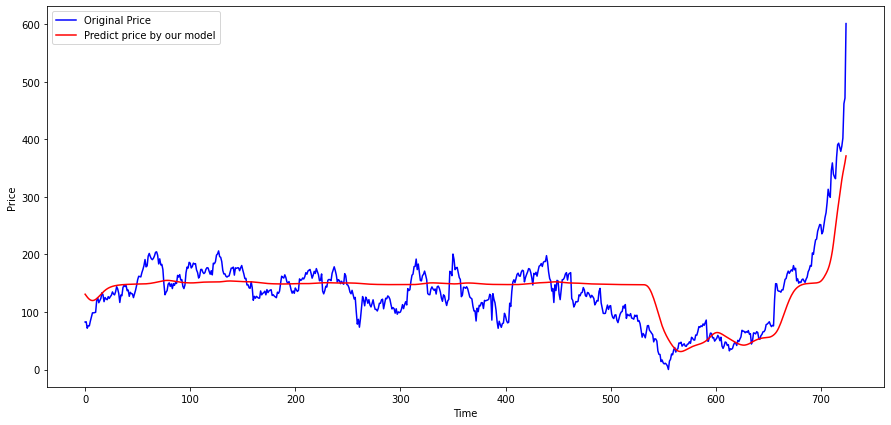

In [74]:
plt.figure(figsize=(15,7))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predict price by our model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()